In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Activity 5
#Uploading Dataframe
df=pd.read_csv("C:/Users/mattl/OneDrive/Documents/GitHub/DSC540/Boston_housing.csv")

In [3]:
#Checking Dataframe
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [7]:
#Finding the total number of records
df.shape


(506, 14)

In [8]:
#Create a smaller DataFrame with columns that do not include CHAS, NOX, B, and LSTAT
df1=df[['CRIM','ZN','INDUS','RM','AGE','DIS','RAD','TAX','PTRATIO','PRICE']]

In [11]:
#Check the last seven records of the new DataFrame you just created.
df1.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


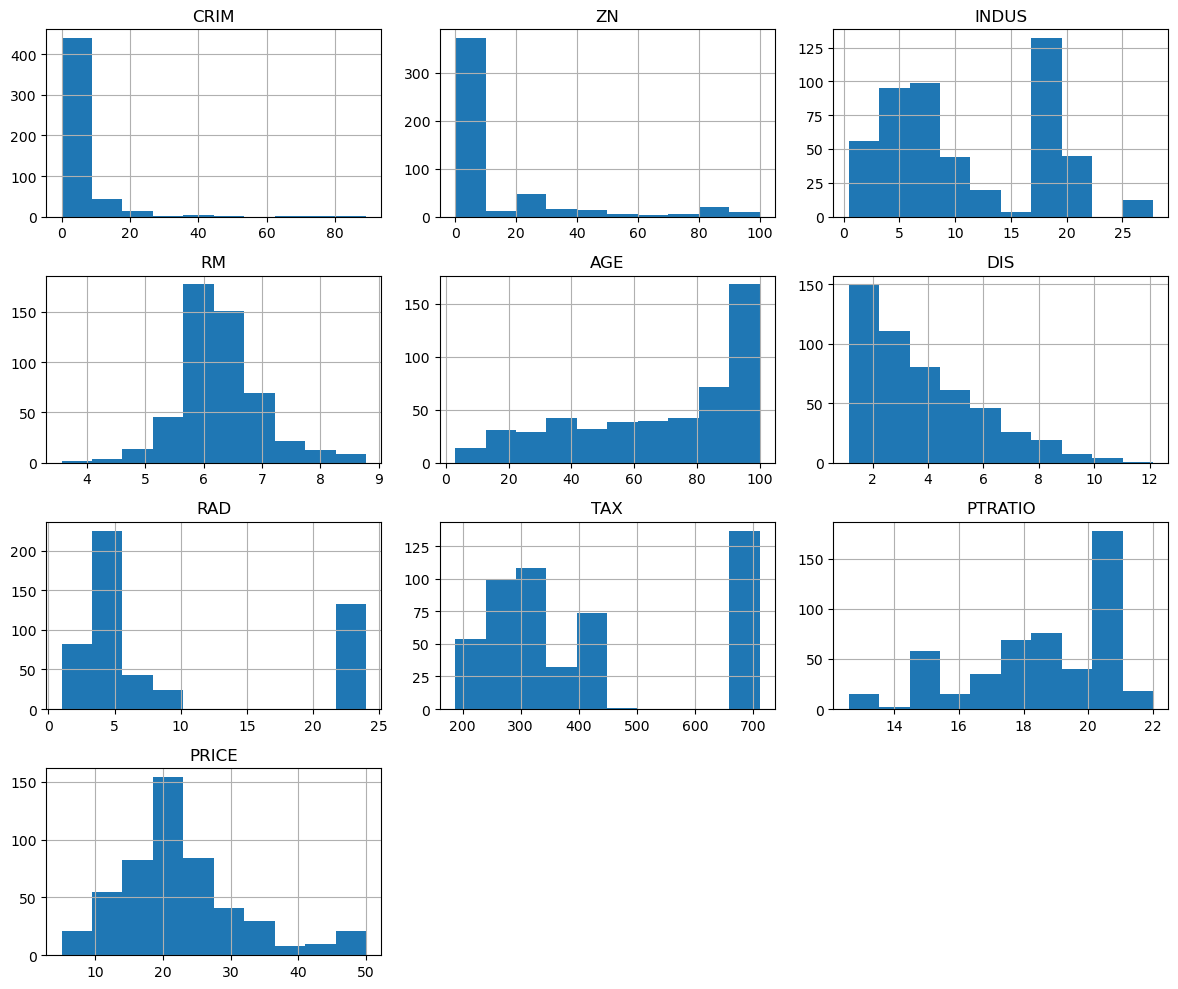

In [14]:
# Plot histograms of all variables in the new DataFrame
df1.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

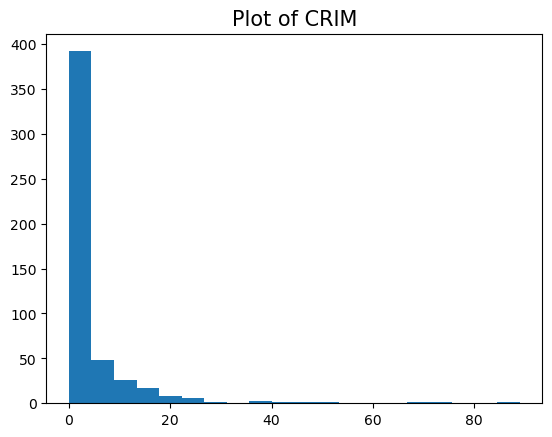

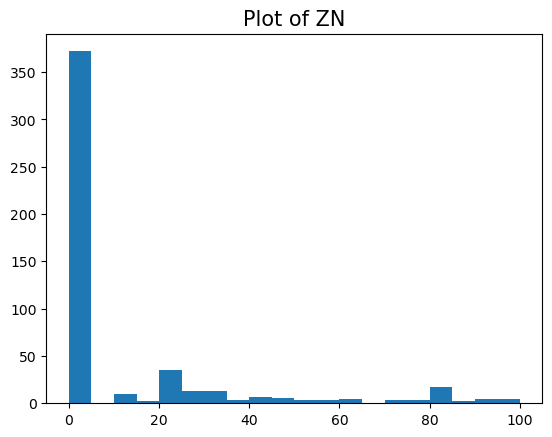

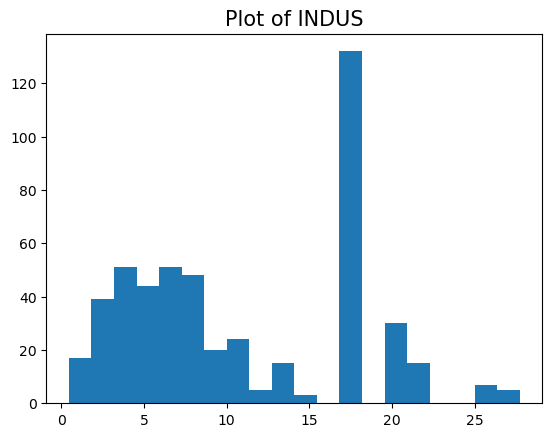

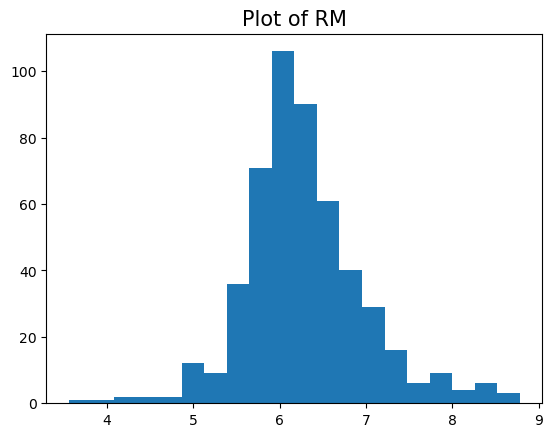

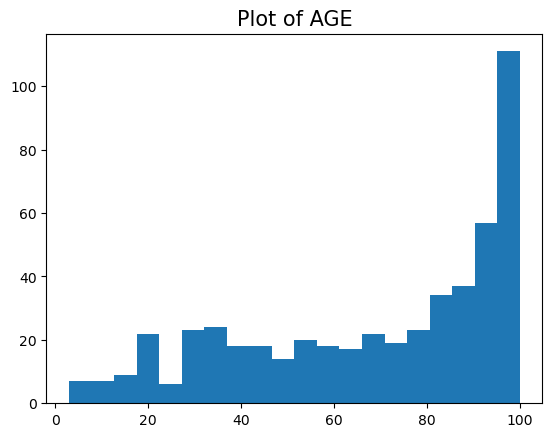

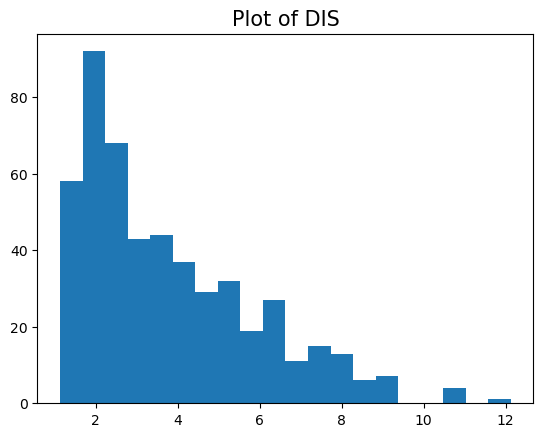

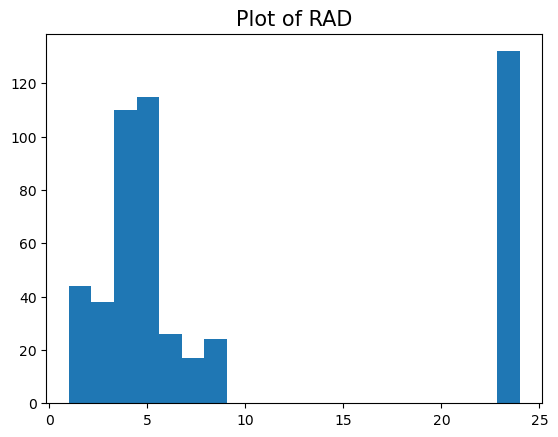

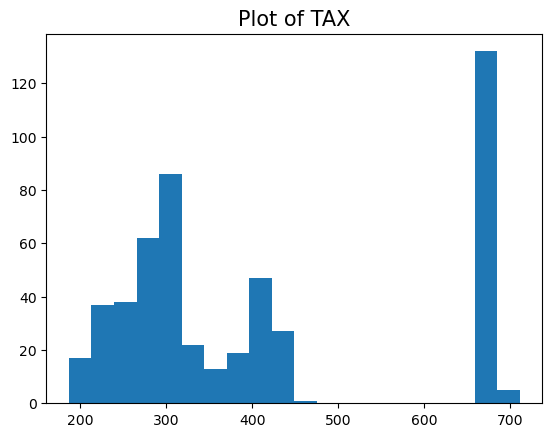

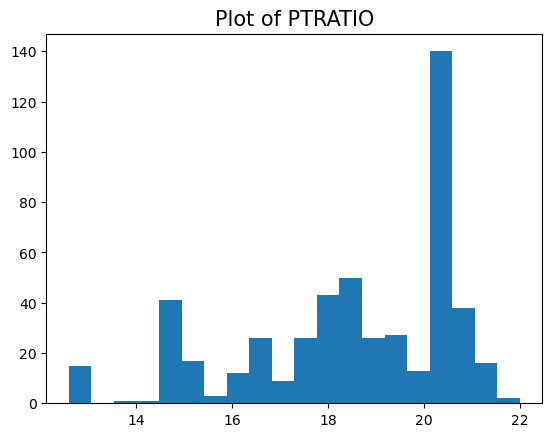

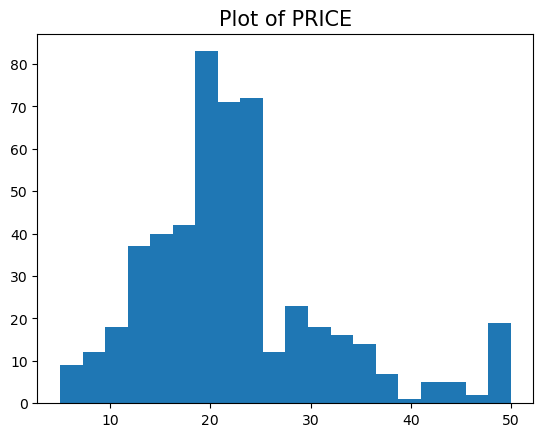

In [22]:
# Making a Histogram for each column using a for loop
for c in df1.columns:
    plt.title("Plot of "+c,fontsize=15)
    plt.hist(df1[c],bins=20)
    plt.show()

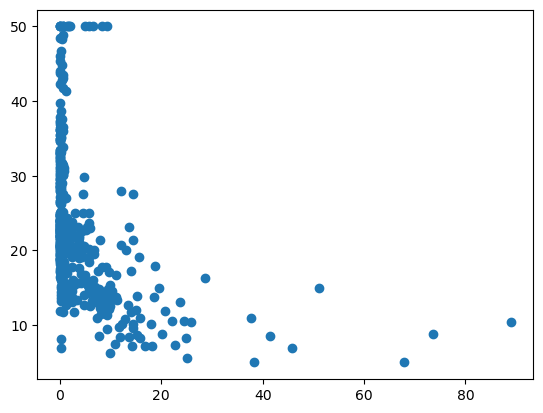

In [23]:
# Create a scatter plot of crime rate versus price
plt.scatter(df1['CRIM'],df1['PRICE'])
plt.show()

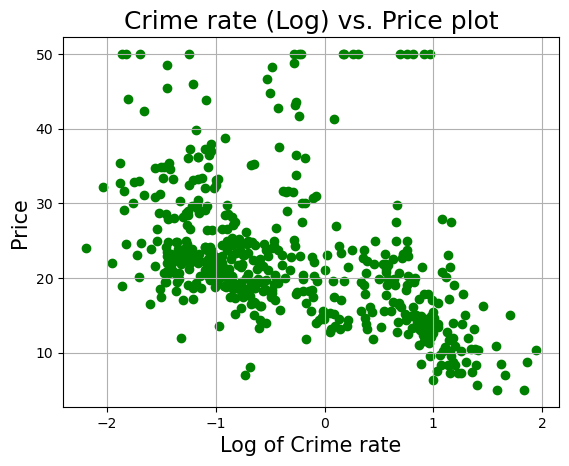

In [25]:
# Plot using log10(crime) versus price
plt.scatter(np.log10(df1['CRIM']),df1['PRICE'],c='green')
plt.title("Crime rate (Log) vs. Price plot", fontsize=18)
plt.xlabel("Log of Crime rate",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid(True)
plt.show()

In [27]:
# Calculate some useful statistics, such as mean rooms per dwelling, median age,
# mean distances to five Boston employment centers, and the percentage of houses
# with a low price (< $20,000)
df1['RM'].mean()

df1['AGE'].median()

df1['DIS'].mean()

low_price=df1['PRICE']<20
print(low_price)
pcnt=low_price.mean()*100
print("\nPercentage of house with <20,000 price is: ",pcnt)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505     True
Name: PRICE, Length: 506, dtype: bool

Percentage of house with <20,000 price is:  41.50197628458498


In [46]:
#Activity 6
#Uploading Dataframe
df2=pd.read_csv("C:/Users/mattl/OneDrive/Documents/GitHub/DSC540/adult_income_data.csv")
df2.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [47]:
# Create a script that will read a text file line by line
names = []
with open("C:/Users/mattl/OneDrive/Documents/GitHub/DSC540/adult_income_names.txt",'r') as f:
    for line in f:
        f.readline()
        var=line.split(":")[0]
        names.append(var)
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [48]:
# Add a name of Income for the response variable to the dataset
names.append('Income')


In [53]:
df_2 = pd.read_csv("C:/Users/mattl/OneDrive/Documents/GitHub/DSC540/adult_income_data.csv",names=names)
df_2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [54]:
# Finding missing values
df_2.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [56]:
# Create a DataFrame with only age, education, and occupation by using subsetting
df_subset = df_2[['age','education','occupation']]
df_subset.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


<Axes: >

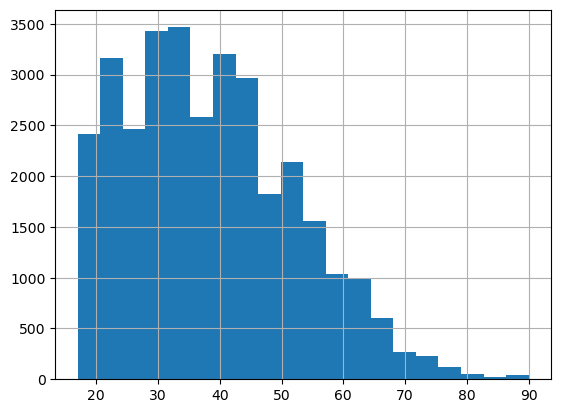

In [57]:
# Plot a histogram of age with a bin size of 20
df_subset['age'].hist(bins=20)

In [65]:
# Create a function to strip the whitespace characters
def strip_whitespace(s):
    return s.strip()

In [61]:
#Use the apply method to apply this function to all the columns with string values,
#create a new column, copy the values from this new column to the old column,
#and drop the new column
# Education column
df_subset['education_stripped']=df_2['education'].apply(strip_whitespace)
df_subset['education']=df_subset['education_stripped']
df_subset.drop(labels=['education_stripped'],axis=1,inplace=True)

# Occupation column
df_subset['occupation_stripped']=df_2['occupation'].apply(strip_whitespace)
df_subset['occupation']=df_subset['occupation_stripped']
df_subset.drop(labels=['occupation_stripped'],axis=1,inplace=True)



C:\Users\mattl\AppData\Local\Temp\ipykernel_25528\2264517958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['education_stripped']=df_2['education'].apply(strip_whitespace)
C:\Users\mattl\AppData\Local\Temp\ipykernel_25528\2264517958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['education']=df_subset['education_stripped']
C:\Users\mattl\AppData\Local\Temp\ipykernel_25528\2264517958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [62]:
# Find the number of people who are aged between 30 and 50
df_filtered=df_subset[(df_subset['age']>=30) & (df_subset['age']<=50)]

In [63]:
df_filtered.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service


In [64]:
# Group the records based on age and education to find how the mean age is distributed
df_subset.groupby(['age','education']).mean()

C:\Users\mattl\AppData\Local\Temp\ipykernel_25528\1686699061.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_subset.groupby(['age','education']).mean()


Empty DataFrame
Columns: []
Index: [(17, 10th), (17, 11th), (17, 12th), (17, 5th-6th), (17, 7th-8th), (17, 9th), (17, HS-grad), (17, Some-college), (18, 10th), (18, 11th), (18, 12th), (18, 5th-6th), (18, 7th-8th), (18, 9th), (18, HS-grad), (18, Masters), (18, Some-college), (19, 10th), (19, 11th), (19, 12th), (19, 1st-4th), (19, 5th-6th), (19, 7th-8th), (19, 9th), (19, Assoc-acdm), (19, Assoc-voc), (19, Bachelors), (19, HS-grad), (19, Preschool), (19, Some-college), (20, 10th), (20, 11th), (20, 12th), (20, 1st-4th), (20, 5th-6th), (20, 7th-8th), (20, 9th), (20, Assoc-acdm), (20, Assoc-voc), (20, Bachelors), (20, HS-grad), (20, Masters), (20, Preschool), (20, Some-college), (21, 10th), (21, 11th), (21, 12th), (21, 1st-4th), (21, 5th-6th), (21, 7th-8th), (21, 9th), (21, Assoc-acdm), (21, Assoc-voc), (21, Bachelors), (21, HS-grad), (21, Masters), (21, Preschool), (21, Some-college), (22, 10th), (22, 11th), (22, 12th), (22, 1st-4th), (22, 5th-6th), (22, 7th-8th), (22, 9th), (22, Assoc-acdm), (22, Assoc-voc), (22, Bachelors), (22, HS-grad), (22, Some-college), (23, 10th), (23, 11th), (23, 12th), (23, 1st-4th), (23, 5th-6th), (23, 7th-8th), (23, 9th), (23, Assoc-acdm), (23, Assoc-voc), (23, Bachelors), (23, HS-grad), (23, Masters), (23, Preschool), (23, Some-college), (24, 10th), (24, 11th), (24, 12th), (24, 1st-4th), (24, 5th-6th), (24, 7th-8th), (24, 9th), (24, Assoc-acdm), (24, Assoc-voc), (24, Bachelors), (24, Doctorate), (24, HS-grad), (24, Masters), (24, Preschool), (24, Some-college), (25, 10th), ...]

[965 rows x 0 columns]

In [66]:
#Create a series and practice basic arithmetic steps
# Create Series 1
data1 = [7.3, -2.5, 3.4, 1.5]
index1 = ['a', 'c', 'd', 'e']
series1 = pd.Series(data1, index=index1)

# Create Series 2
data2 = [-2.1, 3.6, -1.5, 4, 3.1]
index2 = ['a', 'c', 'e', 'f', 'g']
series2 = pd.Series(data2, index=index2)

# Add Series 1 and Series 2
add_result = series1.add(series2, fill_value=0)  # Fill missing values with 0

# Subtract Series 1 from Series 2
subtract_result = series2.subtract(series1, fill_value=0)  # Fill missing values with 0

# Print the results
print("Series 1:")
print(series1)
print("\nSeries 2:")
print(series2)
print("\nAddition Result:")
print(add_result)
print("\nSubtraction Result:")
print(subtract_result)

Series 1:
a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

Series 2:
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

Addition Result:
a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64

Subtraction Result:
a   -9.4
c    6.1
d   -3.4
e   -3.0
f    4.0
g    3.1
dtype: float64
